In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_DIR_PATH = os.path.join('..', '..', 'data')

def laod_data(file_name):
  file_path = os.path.join(DATA_DIR_PATH, file_name)
  return pd.read_csv(file_path, header=0)

In [5]:
df_train = laod_data('bookmark_train_data.csv')
print(len(df_train))

199


In [63]:
from sklearn.preprocessing import LabelEncoder

cat_le = LabelEncoder()
cat_le.fit(df_train['category'])

WORD_CLASSE_LABELS = ['その他', 'フィラー', '副詞', '助動詞', '助詞',
                     '動詞', '名詞', '形容詞', '感動詞', '接続詞',
                     '接頭詞', '記号', '連体詞',]
new_wc_columns = {}
for (i, name) in enumerate(WORD_CLASSE_LABELS):
  new_wc_columns['wc_sum_{}'.format(name)] = 'wc_sum_{}'.format(i)
  new_wc_columns['wc_rate_{}'.format(name)] = 'wc_rate_{}'.format(i)


def data_preprocess(df):
  #new_df = df.drop(['ncode', 'title', 'bookmark_cat'], axis=1)
  new_df = df.drop(['title', 'bookmark_cat'], axis=1)

  new_df['category'] = cat_le.transform(new_df['category'])

  new_df['rating'] = new_df['rating'] * 10
  new_df = new_df.astype({'rating': 'int32'})

  #wc_columns = [col for col in new_df.columns if col.find('wc_') != -1]
  #new_df = new_df.drop(wc_columns, axis=1)
  wc_columns = [col for col in new_df.columns if col.find('wc_sum_') != -1]
  new_df = new_df.drop(wc_columns, axis=1)
  new_df = new_df.rename(columns=new_wc_columns)

  kw_columns = [col for col in new_df.columns if col.find('kw_') != -1]
  new_df = new_df.drop(kw_columns, axis=1)

  return new_df

In [64]:
df_train.keys()

Index(['ncode', 'title', 'category', 'bookmark_cat', 'created_at',
       'updated_at', 'char_count_sum', 'new_line_count_sum',
       'talk_char_count_sum', 'new_line_count_rate_sum',
       'talk_char_count_rate_sum', 'char_count_avg', 'new_line_count_avg',
       'talk_char_count_avg', 'new_line_count_rate_avg',
       'talk_char_count_rate_avg', 'wc_sum_その他', 'wc_sum_フィラー', 'wc_sum_副詞',
       'wc_sum_助動詞', 'wc_sum_助詞', 'wc_sum_動詞', 'wc_sum_名詞', 'wc_sum_形容詞',
       'wc_sum_感動詞', 'wc_sum_接続詞', 'wc_sum_接頭詞', 'wc_sum_記号', 'wc_sum_連体詞',
       'wc_rate_その他', 'wc_rate_フィラー', 'wc_rate_副詞', 'wc_rate_助動詞',
       'wc_rate_助詞', 'wc_rate_動詞', 'wc_rate_名詞', 'wc_rate_形容詞', 'wc_rate_感動詞',
       'wc_rate_接続詞', 'wc_rate_接頭詞', 'wc_rate_記号', 'wc_rate_連体詞', 'kw_冒険者',
       'kw_魔王', 'kw_日常', 'kw_成り上がり', 'kw_内政', 'kw_恋愛', 'kw_無双', 'kw_青春',
       'kw_ハーレム', 'kw_男主人公', 'kw_奴隷', 'kw_テンプレ', 'kw_勘違い', 'kw_ほのぼの', 'kw_貴族',
       'kw_ギルド', 'kw_コメディ', 'kw_異世界', 'kw_エルフ', 'kw_ファンタジー', 'kw_オリジナル戦記',
       

In [233]:
df_train2 = data_preprocess(df_train)

In [234]:
df_train2.head(3)

,ncode,category,created_at,updated_at,char_count_sum,new_line_count_sum,talk_char_count_sum,new_line_count_rate_sum,talk_char_count_rate_sum,char_count_avg,...,wc_rate_4,wc_rate_5,wc_rate_6,wc_rate_7,wc_rate_8,wc_rate_9,wc_rate_10,wc_rate_11,wc_rate_12,rating
0,n4366gd,6,1.586338e+09,1.593468e+09,92340,3840,28950,0.041585,0.313515,3078.0,...,0.237664,0.226083,0.225076,0.013595,0.006042,0.007049,0.006042,0.144008,0.011078,30
1,n7336gg,6,1.590714e+09,1.593338e+09,77880,4140,4950,0.053159,0.063559,2596.0,...,0.238590,0.238013,0.217215,0.017909,0.001155,0.010399,0.001155,0.138070,0.013287,40
2,n9677fw,6,1.575176e+09,1.593429e+09,59880,3090,10230,0.051603,0.170842,1996.0,...,0.240486,0.177328,0.285020,0.014575,0.000000,0.005668,0.008907,0.148178,0.005668,30


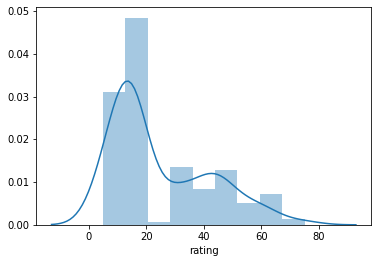

In [67]:
sns.distplot(df_train2['rating'])

In [70]:
feature_names = df_train2.keys()[2:-1]
feature_names

Index(['created_at', 'updated_at', 'char_count_sum', 'new_line_count_sum',
       'talk_char_count_sum', 'new_line_count_rate_sum',
       'talk_char_count_rate_sum', 'char_count_avg', 'new_line_count_avg',
       'talk_char_count_avg', 'new_line_count_rate_avg',
       'talk_char_count_rate_avg', 'wc_rate_0', 'wc_rate_1', 'wc_rate_2',
       'wc_rate_3', 'wc_rate_4', 'wc_rate_5', 'wc_rate_6', 'wc_rate_7',
       'wc_rate_8', 'wc_rate_9', 'wc_rate_10', 'wc_rate_11', 'wc_rate_12'],
      dtype='object')

In [204]:
#col = feature_names[3]
col = 'new_line_count_sum'

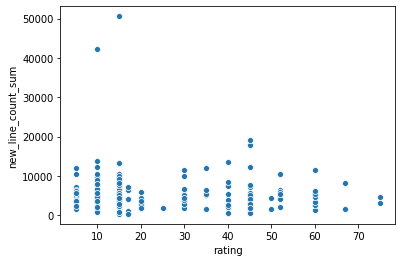

In [205]:
sns.scatterplot(y=col, x='rating', data=df_train2)

In [206]:
mean = df_train2.mean() # 平均
sigma = df_train2.std() # 標準偏差

In [207]:
print(mean[col])
print(sigma[col])

5549.698492462311
5275.382786585037


In [208]:
low = mean[col] - 3 * sigma[col]
high = mean[col] + 3 * sigma[col]

In [209]:
print(low)
print(high)

-10276.449867292802
21375.846852217423


In [210]:
df_3sigma = df_train2[(df_train2[col] > low) & (df_train2[col] < high)]
df_3sigma

,ncode,category,created_at,updated_at,char_count_sum,new_line_count_sum,talk_char_count_sum,new_line_count_rate_sum,talk_char_count_rate_sum,char_count_avg,...,wc_rate_4,wc_rate_5,wc_rate_6,wc_rate_7,wc_rate_8,wc_rate_9,wc_rate_10,wc_rate_11,wc_rate_12,rating
0,n4366gd,6,1.586338e+09,1.593468e+09,92340,3840,28950,0.041585,0.313515,3078.0,...,0.237664,0.226083,0.225076,0.013595,0.006042,0.007049,0.006042,0.144008,0.011078,30
1,n7336gg,6,1.590714e+09,1.593338e+09,77880,4140,4950,0.053159,0.063559,2596.0,...,0.238590,0.238013,0.217215,0.017909,0.001155,0.010399,0.001155,0.138070,0.013287,40
2,n9677fw,6,1.575176e+09,1.593429e+09,59880,3090,10230,0.051603,0.170842,1996.0,...,0.240486,0.177328,0.285020,0.014575,0.000000,0.005668,0.008907,0.148178,0.005668,30
3,n3289ds,6,1.482992e+09,1.592779e+09,88200,7770,11070,0.088095,0.125510,2940.0,...,0.216523,0.219222,0.206803,0.010799,0.012959,0.007559,0.001080,0.203024,0.003780,40
4,n8733gf,6,1.589543e+09,1.593688e+09,100920,3000,34290,0.029727,0.339774,3364.0,...,0.264463,0.205307,0.279252,0.015224,0.001305,0.008264,0.001305,0.098304,0.011309,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,n7612ct,6,1.436805e+09,1.574938e+09,122640,5640,8130,0.045988,0.066292,4088.0,...,0.251648,0.210547,0.269097,0.014734,0.003490,0.006592,0.002714,0.119814,0.009306,10
195,n7979cu,7,1.438773e+09,1.487856e+09,62340,4020,0,0.064485,0.000000,2078.0,...,0.209326,0.137824,0.417617,0.005181,0.001036,0.001036,0.013472,0.153368,0.004145,15
196,n8366dn,6,1.474528e+09,1.545340e+09,97380,4440,4800,0.045595,0.049291,3246.0,...,0.246251,0.208515,0.265119,0.015481,0.000000,0.011611,0.001451,0.124819,0.008708,15
197,n3843dl,6,1.470146e+09,1.526466e+09,99570,8070,10650,0.081049,0.106960,3319.0,...,0.246718,0.204595,0.274070,0.009847,0.002735,0.007112,0.000547,0.142232,0.004376,10


In [211]:
df_3sigma_2 = df_train2[(df_train2[col] < low) | (df_train2[col] > high)]
df_3sigma_2

,ncode,category,created_at,updated_at,char_count_sum,new_line_count_sum,talk_char_count_sum,new_line_count_rate_sum,talk_char_count_rate_sum,char_count_avg,...,wc_rate_4,wc_rate_5,wc_rate_6,wc_rate_7,wc_rate_8,wc_rate_9,wc_rate_10,wc_rate_11,wc_rate_12,rating
48,n9129ga,6,1.582340e+09,1.588648e+09,1111500,50610,163740,0.045533,0.147314,37050.0,...,0.221870,0.181486,0.317171,0.013520,0.001057,0.004272,0.004228,0.151363,0.006606,15
138,n2335de,6,1.457236e+09,1.593270e+09,715650,42390,5850,0.059233,0.008174,23855.0,...,0.213211,0.143655,0.398198,0.009085,0.000074,0.001862,0.004766,0.166145,0.002681,10


In [212]:
df_3sigma_2[col]

48     50610
138    42390
Name: new_line_count_sum, dtype: int64

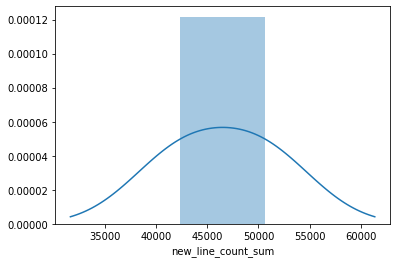

In [213]:
sns.distplot(df_3sigma_2[col])

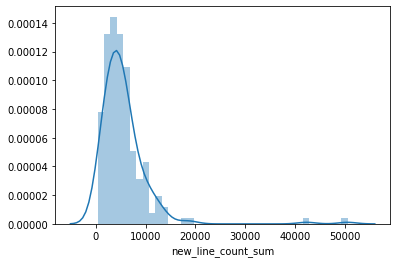

In [214]:
sns.distplot(df_train2[col])

In [218]:
def show_outlier(df_input, col):
  mean = df_input.mean()
  sigma = df_input.std() 

  low = mean[col] - 3 * sigma[col]
  high = mean[col] + 3 * sigma[col]

  df_3sigma = df_input[(df_input[col] < low) | (df_input[col] > high)]

  print(col, len(df_3sigma.index), low, high)

  if len(df_3sigma.index) > 0:
    for index, row in df_3sigma.iterrows():
      print(row['ncode'], row['rating'], row[col])

In [219]:
#show_outlier(df_train2, 'new_line_count_sum')

In [229]:
for col in df_train2.keys()[4:-1]:
  show_outlier(df_train2, col)
  print()

char_count_sum 3 -210555.12800549556 454356.5350406715
n9129ga 15 1111500
n4605bu 45 529590
n2335de 10 715650

new_line_count_sum 2 -10276.449867292802 21375.846852217423
n9129ga 15 50610
n2335de 10 42390

talk_char_count_sum 3 -57771.08490183151 96900.43163549984
n5824ct 40 120690
n9129ga 15 163740
n5306by 45 153360

new_line_count_rate_sum 1 0.005439752585186398 0.08877811652886841
n5764bn 15 0.0978021978021978

talk_char_count_rate_sum 2 -0.25683755994796975 0.5423582950306785
n5306by 45 0.6465157455419249
n7578ga 5 0.5462334880399857

char_count_avg 3 -7018.504266849852 15145.217834689049
n9129ga 15 37050.0
n4605bu 45 17653.0
n2335de 10 23855.0

new_line_count_avg 2 -342.54832890976 712.5282284072474
n9129ga 15 1687.0
n2335de 10 1413.0

talk_char_count_avg 3 -1925.7028300610505 3230.0143878499953
n5824ct 40 4023.0
n9129ga 15 5458.0
n5306by 45 5112.0

new_line_count_rate_avg 1 0.005439752585186398 0.08877811652886841
n5764bn 15 0.0978021978021978

talk_char_count_rate_avg 2 -0.25683

In [227]:
def filter_outlier(df_input, col):
  mean = df_input.mean()
  sigma = df_input.std() 

  low = mean[col] - 3 * sigma[col]
  high = mean[col] + 3 * sigma[col]

  df_3sigma = df_input[(df_train2[col] > low) & (df_train2[col] < high)]

  return df_3sigma

In [237]:
#df_train3 = df_train2.copy()
#df_train3 = filter_outlier(df_train3, 'char_count_sum')
#df_train3

In [241]:
import warnings
warnings.filterwarnings('ignore')

In [242]:
df_train3 = df_train2.copy()

for col in df_train3.keys()[4:-1]:
  df_train3 = filter_outlier(df_train3, col)

In [243]:
df_train3

,ncode,category,created_at,updated_at,char_count_sum,new_line_count_sum,talk_char_count_sum,new_line_count_rate_sum,talk_char_count_rate_sum,char_count_avg,...,wc_rate_4,wc_rate_5,wc_rate_6,wc_rate_7,wc_rate_8,wc_rate_9,wc_rate_10,wc_rate_11,wc_rate_12,rating
0,n4366gd,6,1.586338e+09,1.593468e+09,92340,3840,28950,0.041585,0.313515,3078.0,...,0.237664,0.226083,0.225076,0.013595,0.006042,0.007049,0.006042,0.144008,0.011078,30
1,n7336gg,6,1.590714e+09,1.593338e+09,77880,4140,4950,0.053159,0.063559,2596.0,...,0.238590,0.238013,0.217215,0.017909,0.001155,0.010399,0.001155,0.138070,0.013287,40
4,n8733gf,6,1.589543e+09,1.593688e+09,100920,3000,34290,0.029727,0.339774,3364.0,...,0.264463,0.205307,0.279252,0.015224,0.001305,0.008264,0.001305,0.098304,0.011309,30
6,n5619fv,6,1.572513e+09,1.593421e+09,78840,4620,1410,0.058600,0.017884,2628.0,...,0.245772,0.245209,0.227170,0.010710,0.001691,0.004510,0.000000,0.114994,0.007328,30
7,n5378gc,6,1.584934e+09,1.593508e+09,51300,1980,3450,0.038596,0.067251,1710.0,...,0.242481,0.217105,0.250000,0.015977,0.001880,0.008459,0.001880,0.139098,0.004699,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,n3473cm,8,1.421669e+09,1.517615e+09,187440,8130,36720,0.043374,0.195903,6248.0,...,0.256209,0.204328,0.229162,0.020900,0.006147,0.005164,0.001475,0.146054,0.007131,15
194,n7612ct,6,1.436805e+09,1.574938e+09,122640,5640,8130,0.045988,0.066292,4088.0,...,0.251648,0.210547,0.269097,0.014734,0.003490,0.006592,0.002714,0.119814,0.009306,10
196,n8366dn,6,1.474528e+09,1.545340e+09,97380,4440,4800,0.045595,0.049291,3246.0,...,0.246251,0.208515,0.265119,0.015481,0.000000,0.011611,0.001451,0.124819,0.008708,15
197,n3843dl,6,1.470146e+09,1.526466e+09,99570,8070,10650,0.081049,0.106960,3319.0,...,0.246718,0.204595,0.274070,0.009847,0.002735,0.007112,0.000547,0.142232,0.004376,10
